# Vacant Threshold test

In [1]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams,ParkingProviderLocal
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
from src.detector.OccupancyDetectorBorders import OccupancyDetectorBorders
import cv2 as cv

metrics_list = list()
row_names = list()
random_seed = datetime.now().timestamp
 
def test_parking(parking_id, detection_params:DetectionParams, row_name, process_batch=True):
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=4, random_seed=random_seed)
    
    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    if process_batch:
        try:
            detection_params.show_imshow=False
            processor.process_batch()
        except (NoSpacesException, NoImageException) as ex:
            print(f"Finished processing samples: ", ex)

    else:
        while True:
            try:
                processor.process()
            except (NoSpacesException, NoImageException) as ex:
                print(f"Finished processing samples: ", ex)
                break
        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_vacant_threshold(parking_id, detection_params:DetectionParams, vacant_threshold_list):
    
    for k in vacant_threshold_list:
        
        row_name = f'{parking_id} k={k}'
        print('Testing ', row_name)
        
        detection_params.vacant_threshold = k
        test_parking(parking_id, detection_params, row_name)
        
    PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)
        

## UFPR04

Testing  UFPR04 k=0.3
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [02:09<00:00,  7.30it/s]

Precision: 0.748
specificity: 0.676
Recall: 0.819
F1 Score: 0.782
Accuracy: 0.753


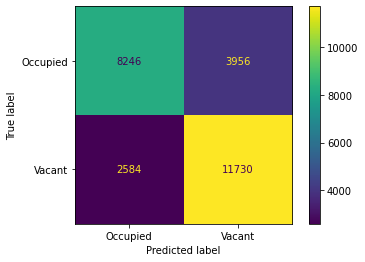

Testing  UFPR04 k=0.27
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [02:22<00:00,  6.66it/s]

Precision: 0.837
specificity: 0.791
Recall: 0.809
F1 Score: 0.822
Accuracy: 0.801


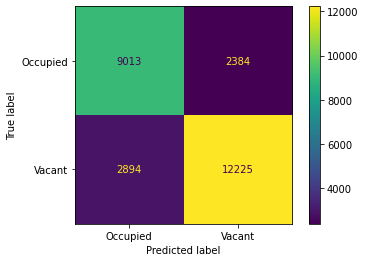

Testing  UFPR04 k=0.25
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [02:29<00:00,  6.34it/s]


Precision: 0.853
specificity: 0.839
Recall: 0.765
F1 Score: 0.807
Accuracy: 0.798


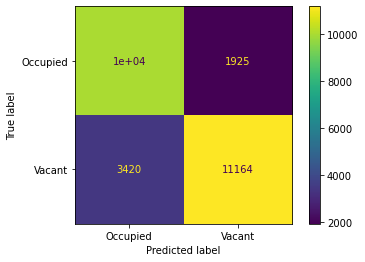

Testing  UFPR04 k=0.23
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [02:35<00:00,  6.08it/s]

Precision: 0.869
specificity: 0.869
Recall: 0.706
F1 Score: 0.779
Accuracy: 0.779


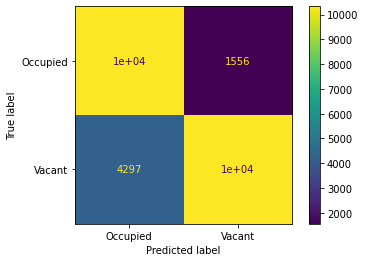

Testing  UFPR04 k=0.2
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [03:51<00:00,  4.10it/s]


Precision: 0.905
specificity: 0.921
Recall: 0.598
F1 Score: 0.721
Accuracy: 0.742


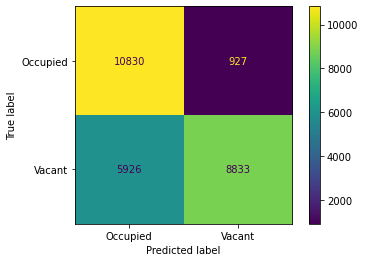

Testing  UFPR04 k=0.18
Selected 947 files:

Processing 947 files with 16 cores


100%|██████████| 947/947 [05:44<00:00,  2.75it/s]

Precision: 0.894
specificity: 0.923
Recall: 0.537
F1 Score: 0.671
Accuracy: 0.711


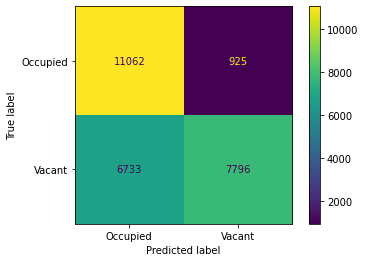

               precision  specificity  recall     f1  accuracy
UFPR04 k=0.3       0.748        0.676   0.819  0.782     0.753
UFPR04 k=0.27      0.837        0.791   0.809  0.822     0.801
UFPR04 k=0.25      0.853        0.839   0.765  0.807     0.798
UFPR04 k=0.23      0.869        0.869   0.706  0.779     0.779
UFPR04 k=0.2       0.905        0.921   0.598  0.721     0.742
UFPR04 k=0.18      0.894        0.923   0.537  0.671     0.711


In [2]:
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=31, at_C=10, median_k=3, bw_size=50, vacant_threshold=0.3, show_imshow=True)  # UFPR04
test_vacant_threshold('UFPR04', PARAMS_UFPR04, [0.3, 0.27, 0.25, 0.23, 0.20, 0.18])